**Algoritmo Decision Tree de Titanic dataset**

---



Instalando bibliotecas...

In [ ]:
%pip -q install yellowbrick
%pip install --upgrade sklearn

Importando bibliotecas


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

Abrindo base de dados tratada

In [67]:
import pickle
with open('/content/sample_data/Titanic_t5.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

Treinando a árvore

In [82]:
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=3)
Y = modelo.fit(X_treino, y_treino)

In [86]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

In [ ]:
y_teste

Calculando a acuracia e gerando a matriz de confusao

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8100558659217877

In [73]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[92, 13],
       [21, 53]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8044692737430168

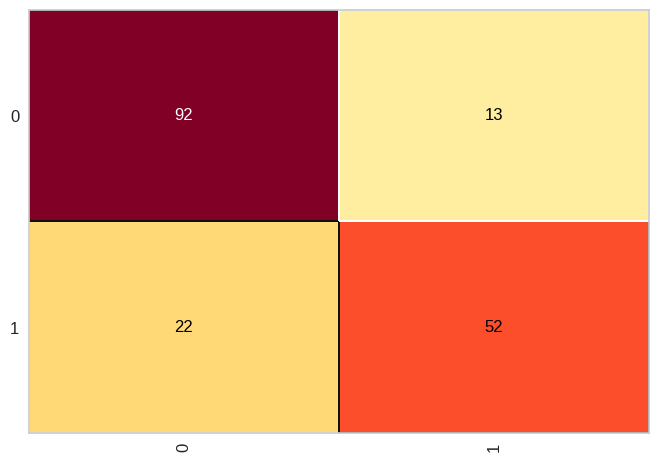

In [79]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

Gerando a arvore de decisao

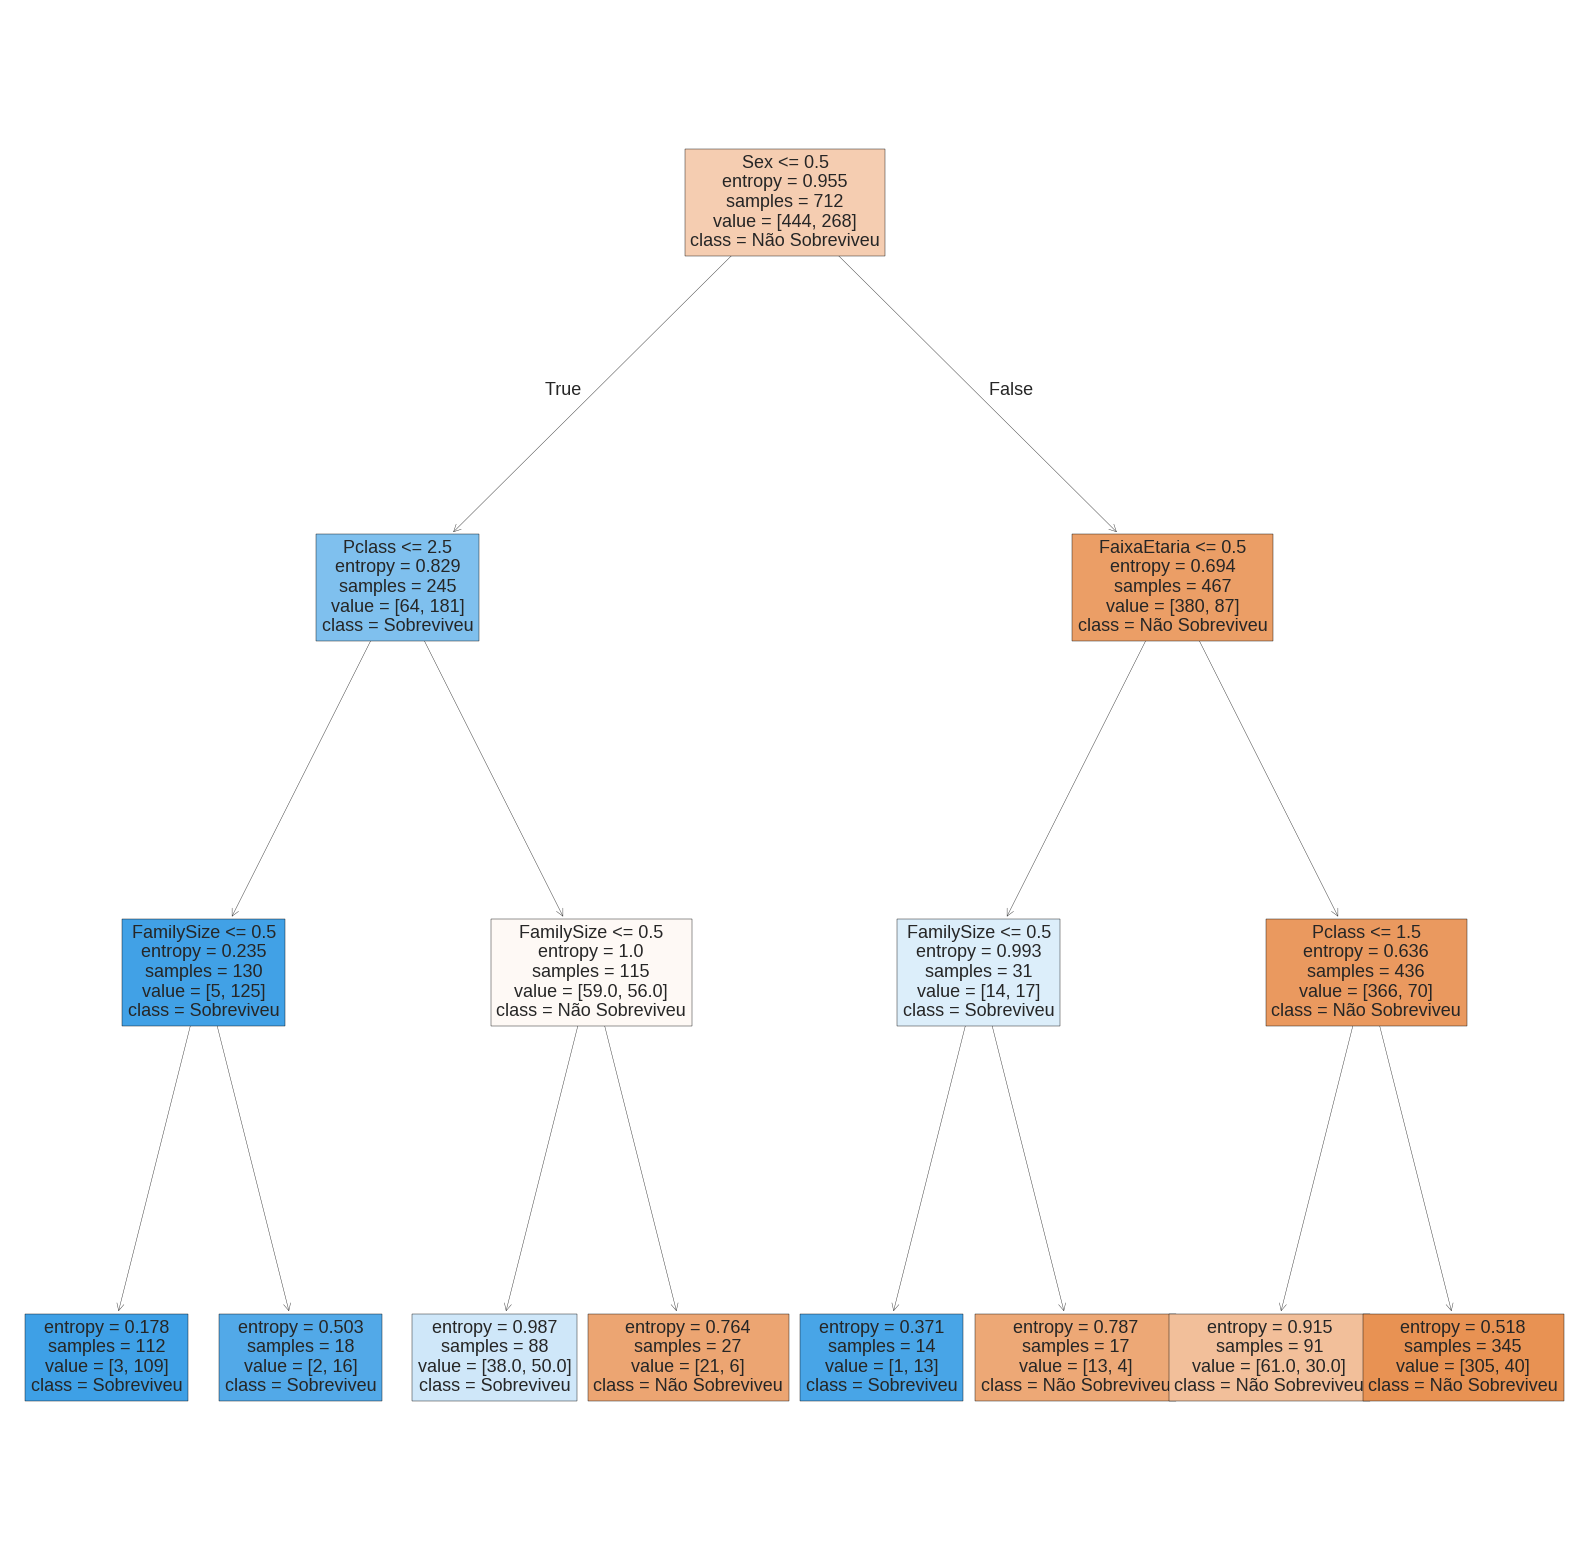

In [85]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
# Convert class names to strings
class_names_str = ["Não Sobreviveu", "Sobreviveu"]
tree.plot_tree(modelo, feature_names=previsores, class_names=class_names_str,fontsize=13,filled=True);